 Variational Inference for Bayesian Univariate Gaussian
 source: https://michaelpjcamilleri.wordpress.com/2020/03/24/variational-inference-for-bayesian-univariate-gaussian/

In [1]:
from matplotlib import pyplot as plt
# Enable LaTeX rendering for matplotlib
plt.rcParams['text.usetex'] = False
from scipy.stats import norm, gamma
import numpy as np

# CONSTANTS
MEAN = 0.0
PRECISION = 1.0
N = 100
MU_0 = 0.0
BETA_0 = 10.0
A_0 = 20
B_0 = 20
TOLERANCE = 1e-4 # tolerance for iterative example

Plot the data against the prior, notice that prior does not exactly line up with the data

/var/folders/8g/9gktnhys29123gd2vy8kl6q40000gn/T/ipykernel_1117/1818742317.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  pMu = norm(loc=MU_0, scale=1/np.sqrt(BETA_0 * tau))


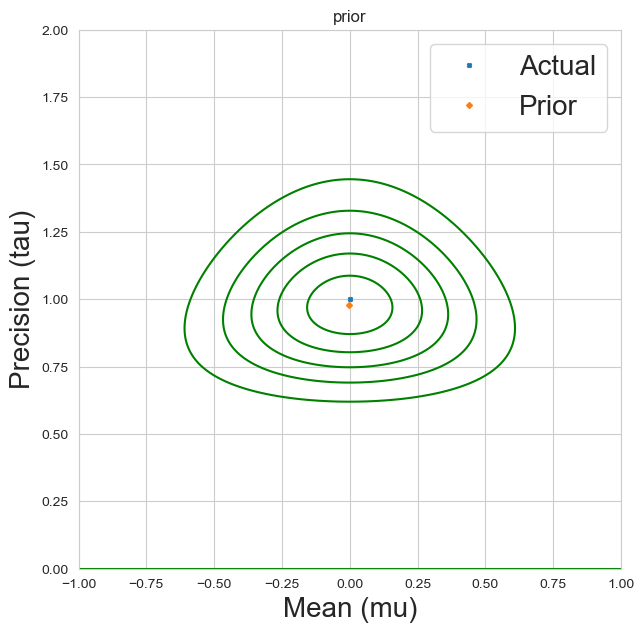

In [2]:
# Generate Interpolation Grid:
mus = np.linspace(-1, 1, 400)
taus = np.linspace(0, 2, 400)

# Now we can compute the probabilities:
Z_Prior = np.empty([len(mus), len(taus)])
#  We can create pTau as this is independent of anything:
pTau = gamma(a=A_0, loc=0, scale=1/B_0)
#  Since Mu depends on Tau, we will have to compute this in a loop
for i_t, tau in enumerate(taus):
    pMu = norm(loc=MU_0, scale=1/np.sqrt(BETA_0 * tau))
    Z_Prior[:, i_t] = pMu.pdf(mus) * pTau.pdf(tau)

Z_mu_p, Z_tau_p = np.unravel_index(np.argmax(Z_Prior), Z_Prior.shape)
Z_mu_p, Z_tau_p = mus[Z_mu_p], taus[Z_tau_p]

# Now Plot
plt.figure(figsize=[7,7])
plt.title('prior')
plt.plot(MEAN, PRECISION, 'X', label='Actual', markersize=3)
plt.contour(*np.meshgrid(mus, taus), Z_Prior.T, levels=5, colors=['green'])
plt.plot(Z_mu_p, Z_tau_p, 'D', label='Prior',  markersize=3)
# plt.xlim([-0.15, 0.26])
# plt.ylim([0.75, 1.25])
plt.xlabel('Mean (mu)', fontsize=20)
plt.ylabel('Precision (tau)', fontsize=20)
_ = plt.legend(fontsize=20)
plt.show()

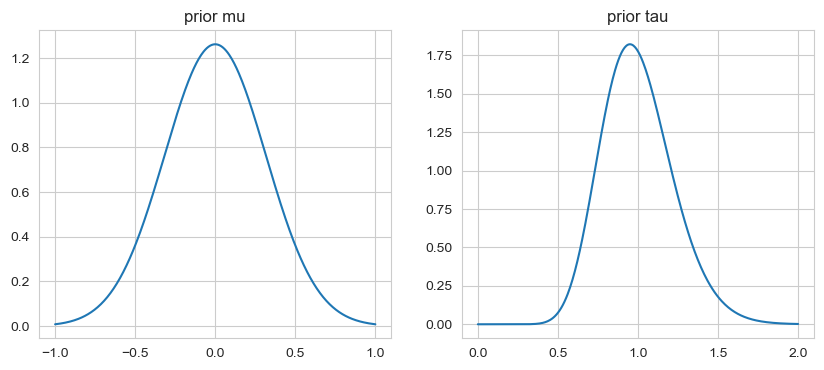

In [70]:
# plt.plot(MEAN, PRECISION, 'X', label='Actual')
# plt.contour(*np.meshgrid(mus, taus), Z_Prior.T, levels=5, colors=['green'])
plt.figure(figsize=[10, 4])
plt.subplot(121)
plt.title('prior mu')
pMu = norm(loc=MU_0, scale=1/np.sqrt(BETA_0))
plt.plot(mus, pMu.pdf(mus))
plt.subplot(122)
plt.title('prior tau')
plt.plot(taus, pTau.pdf(taus))
plt.show()

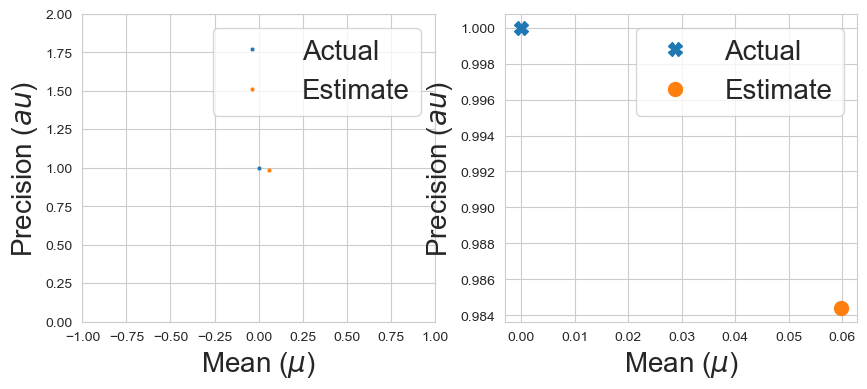

In [71]:
# maximum likelihood

# Let us generate the Data and visualise it.
np.random.seed(0)
X = np.random.normal(loc=MEAN, scale=np.sqrt(1/PRECISION), size=N)

# Plot Actual and estimated
plt.figure(figsize=[10, 4])
plt.subplot(121)
plt.plot(MEAN, PRECISION, 'X', markersize=2, label='Actual')
plt.plot(X.mean(), 1/X.var(), 'o', markersize=2, label='Estimate')
plt.xlim([-1, 1])
plt.ylim([0, 2])
plt.xlabel('Mean ($\mu$)', fontsize=20)
plt.ylabel('Precision ($\tau$)', fontsize=20)
_ = plt.legend(fontsize=20)
plt.subplot(122)
plt.plot(MEAN, PRECISION, 'X', markersize=10, label='Actual')
plt.plot(X.mean(), 1/X.var(), 'o', markersize=10, label='Estimate')
plt.xlabel('Mean ($\mu$)', fontsize=20)
plt.ylabel('Precision ($\tau$)', fontsize=20)
_ = plt.legend(fontsize=20)


/var/folders/8g/9gktnhys29123gd2vy8kl6q40000gn/T/ipykernel_7941/4046229588.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  pMu = norm(loc=mu_N, scale=1/np.sqrt((N+BETA_0) * tau))


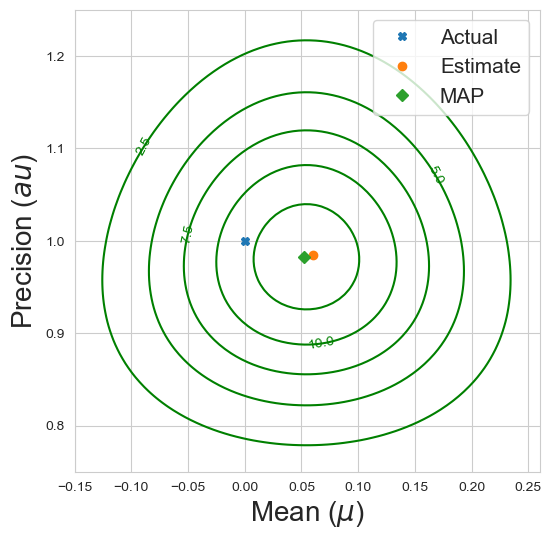

In [72]:
# Generate Parameters (i.e. solve) the posterior
mu_N = (BETA_0 * MU_0 + X.sum())/(N + BETA_0)
a_N = A_0 + N/2
b_N = B_0 + 0.5 * np.square(X).sum() + 0.5 * BETA_0 * (MU_0**2) - 0.5 * (N + BETA_0) * mu_N**2

# Now we can compute the probabilities:
Z_Exact = np.empty_like(Z_Prior)
#  We can create pTau as this is independent of anything:
pTau = gamma(a=a_N, loc=0, scale=1/b_N)
#  Since Mu depends on Tau, we will have to compute this in a loop
for i_t, tau in enumerate(taus):
    pMu = norm(loc=mu_N, scale=1/np.sqrt((N+BETA_0) * tau))
    Z_Exact[:, i_t] = pMu.pdf(mus) * pTau.pdf(tau)
# Find the maximum
Z_mu_e, Z_tau_e = np.unravel_index(np.argmax(Z_Exact), Z_Exact.shape)
Z_mu_e, Z_tau_e = mus[Z_mu_e], taus[Z_tau_e]

# Now Plot
plt.figure(figsize=[6,6])
plt.plot(MEAN, PRECISION, 'X', label='Actual')
plt.plot(X.mean(), 1/X.var(), 'o', label='Estimate')
plt.plot(Z_mu_e, Z_tau_e, 'D', label='MAP')
plt.clabel(plt.contour(*np.meshgrid(mus, taus), Z_Exact.T, levels=5, colors=['green']), inline=0, fontsize=10)
# plt.contour(*np.meshgrid(mus, taus), Z_Exact.T, levels=10, colors=['green'], inline=0, fontsize=10)
plt.xlim([-0.15, 0.26])
plt.ylim([0.75, 1.25])
plt.xlabel('Mean ($\mu$)', fontsize=20)
plt.ylabel('Precision ($\tau$)', fontsize=20)
_ = plt.legend(fontsize=15)

# SOLUTION BY VARIATIONAL INFERENCE

For the Variational solution, we assume that our posterior factorizes as:

$q(\tau, \mu) = q(\tau) \cdot q(\mu)$

## Explicit inference
we can solve the equations to find an exact solution to this somehow


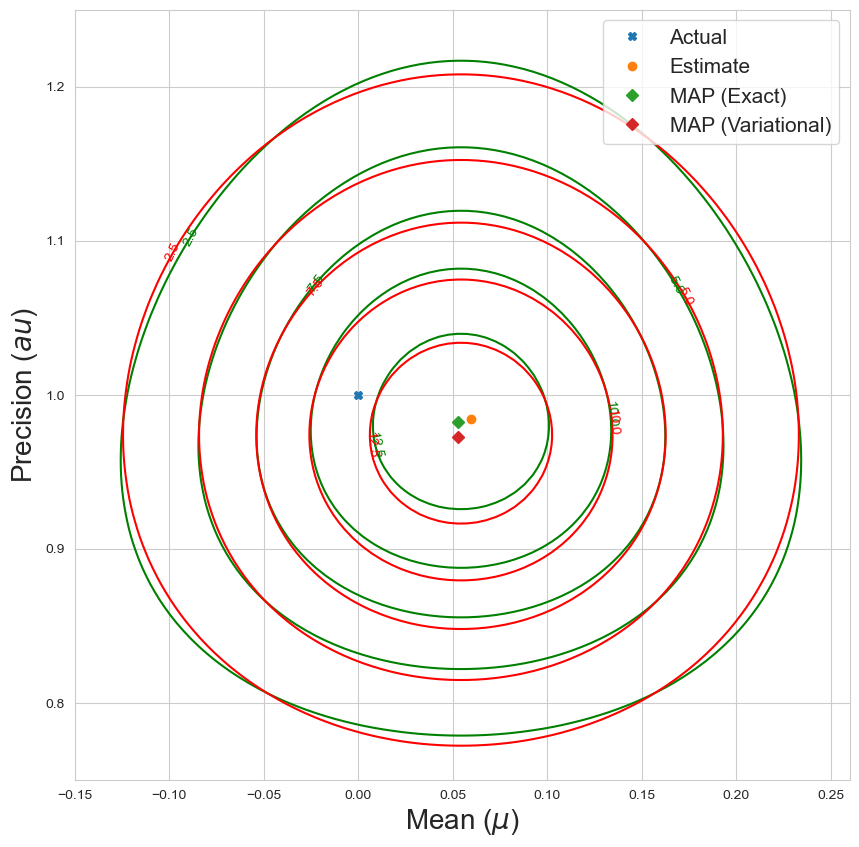

In [73]:
# Implement Solution
a_N = A_0 + (N+1)/2
b_N = (B_0 + 0.5 * X.var() * N + 0.5 * BETA_0 * ((X.mean() - MU_0) ** 2)) * (2*N*a_N/(2*N*a_N - N - BETA_0))
mu_N = (BETA_0 * MU_0 + N * X.mean())/(BETA_0 + N)
beta_N = (BETA_0 + N) * a_N/b_N

# Now Compute
#  We will use the same intepolation grid as before: also, since now neither Mu_N nor Beta_N depend on tau directly, we
#  can compute all at one go:
pTau = gamma(a=a_N, loc=0, scale=1/b_N)
pMu = norm(loc=mu_N, scale=1/np.sqrt(beta_N))
Z_EVI = np.outer(pMu.pdf(mus), pTau.pdf(taus))
Z_mu_v, Z_tau_v = np.unravel_index(np.argmax(Z_EVI), Z_EVI.shape)
Z_mu_v, Z_tau_v = mus[Z_mu_v], taus[Z_tau_v]

# Now Plot
plt.figure(figsize=[10,10])
plt.plot(MEAN, PRECISION, 'X', label='Actual')
plt.plot(X.mean(), 1/X.var(), 'o', label='Estimate')
plt.plot(Z_mu_e, Z_tau_e, 'D', label='MAP (Exact)')
plt.plot(Z_mu_v, Z_tau_v, 'D', label='MAP (Variational)')
plt.clabel(plt.contour(*np.meshgrid(mus, taus), Z_Exact.T, levels=5, colors=['green']), inline=0, fontsize=10)
plt.clabel(plt.contour(*np.meshgrid(mus, taus), Z_EVI.T, levels=5, colors=['red']), inline=0, fontsize=10)
plt.xlim([-0.15, 0.26])
plt.ylim([0.75, 1.25])
plt.xlabel('Mean ($\mu$)', fontsize=20)
_ = plt.ylabel('Precision ($\tau$)', fontsize=20)
_ = plt.legend(fontsize=15)

## ITERATED INFERENCE

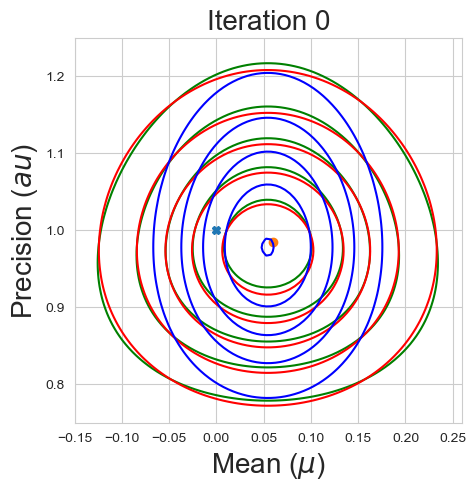

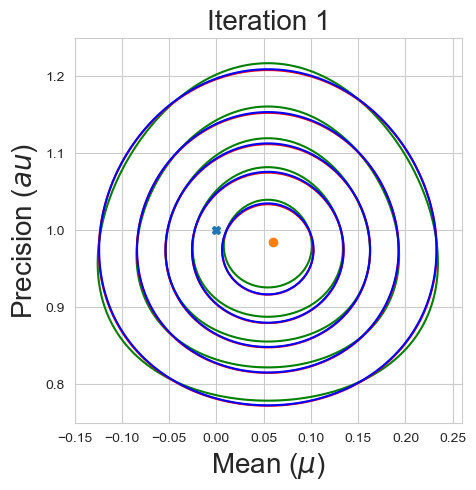

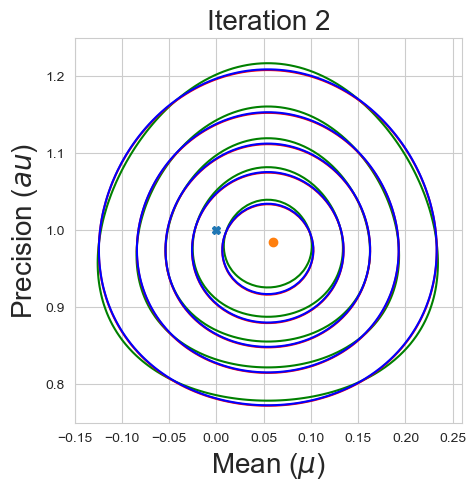

In [80]:
# We need to set up an initial value for tau: let us try 2 just for the sake of it.
E_tau = 2
E_tau_prev = np.NaN  # Keep track of tau until it does not change much:
iterations = 0

while np.isnan(E_tau_prev) or np.abs(E_tau - E_tau_prev) > TOLERANCE and iterations < 10:

    # Step A.1
    mu_N = (BETA_0 * MU_0 + N * X.mean())/(BETA_0 + N)
    beta_N = (BETA_0 + N) * E_tau
    # Step A.2
    E_mu = mu_N
    E_mu2 = beta_N ** -1  + E_mu ** 2

    # Step B.1
    a_N = A_0 + (N+1)/2
    b_N = B_0 + 0.5 * (np.square(X) - 2 * E_mu * X + E_mu2).sum() + 0.5 * BETA_0 * (E_mu2 - 2 * E_mu * MU_0 + MU_0**2)
    # Step B.2
    E_tau_prev = E_tau
    E_tau = a_N/b_N

    # Now Compute
    #  We will use the same intepolation grid as before: also, since now neither Mu_N nor Beta_N depend on tau directly, we
    #  can compute all at one go:
    pTau = gamma(a=a_N, loc=0, scale=1/b_N)
    pMu = norm(loc=mu_N, scale=1/np.sqrt(beta_N))
    Z_IVI = np.outer(pMu.pdf(mus), pTau.pdf(taus))

    # Now Plot
    plt.figure(figsize=[5,5])
    plt.plot(MEAN, PRECISION, 'X', label='Actual')
    plt.plot(X.mean(), 1/X.var(), 'o', label='Estimate')
    plt.contour(*np.meshgrid(mus, taus), Z_Exact.T, levels=5, colors=['green'])
    plt.contour(*np.meshgrid(mus, taus), Z_EVI.T, levels=5, colors=['red'])
    plt.contour(*np.meshgrid(mus, taus), Z_IVI.T, levels=5, colors=['blue'])
    plt.xlim([-0.15, 0.26])
    plt.ylim([0.75, 1.25])
    plt.title('Iteration {}'.format(iterations), fontsize=20)
    plt.xlabel('Mean ($\mu$)', fontsize=20)
    _ = plt.ylabel('Precision ($\tau$)', fontsize=20)

    iterations += 1


## Gibbs sampling

Not sure if this makes sense...


In [87]:



# N = 100
# MU_0 = 0.0
# BETA_0 = 10.0
# A_0 = 20
# B_0 = 20

# Initialize variables
mu = np.mean(X)  # Initial value for mu
tau = 1.0  # Initial value for tau (precision)

# Gibbs sampling iterations
num_iterations = 10000  # Adjust as needed
samples_mu = []
samples_tau = []

for _ in range(num_iterations):
    # Sample mu from its conditional distribution
    beta_N = N + BETA_0
    mu_N = (N * np.mean(X) + BETA_0 * MU_0) / ( N + BETA_0 )
    mu = np.random.normal(mu_N, np.sqrt(1/ (beta_N * tau)))

    # Sample tau from its conditional distribution
    a_n = A_0 + ( N / 2 )
    b_n = B_0 + 0.5 * (np.sum((X - mu) ** 2))
    tau = np.random.gamma(A_0, 1.0 / b_n)

    samples_mu.append(mu)
    samples_tau.append(tau)


In [ ]:
# sampling \mu this needs work and need ot compare to init prior and what not, come back to it...

# MU_0 = 0.0
# SIGMA_0 = 1

MU_0 = 0
SIGMA_0 = 2
SIGMA = 1


num_iterations = 10000  # Adjust as needed
samples_mu = []
samples_tau = []

for _ in range(num_iterations):
    DEN = N*(SIGMA_0 ** 2) + (SIGMA ** 2)



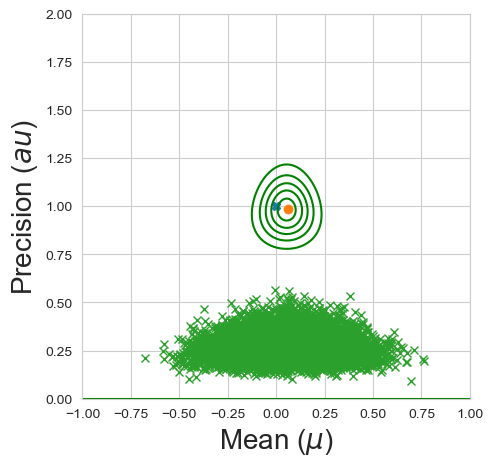

In [88]:

# Now Plot
plt.figure(figsize=[5,5])
plt.plot(MEAN, PRECISION, 'X', label='Actual')
plt.plot(X.mean(), 1/X.var(), 'o', label='Estimate')
plt.plot(samples_mu, samples_tau, 'x', label='Gibbs')
plt.contour(*np.meshgrid(mus, taus), Z_Exact.T, levels=5, colors=['green'])
# plt.xlim([-0.15, 0.26])
# plt.ylim([0.75, 1.25])
plt.xlabel('Mean ($\mu$)', fontsize=20)
_ = plt.ylabel('Precision ($\tau$)', fontsize=20)

In [107]:
import numpy as np
from scipy.stats import norm, gamma

# Sample data
np.random.seed(42)
N = 100
true_mu = 0
true_tau = 1
X = np.random.normal(true_mu, 1.0 / np.sqrt(true_tau), N)

# Prior hyperparameters
mu0 = 0
lambda0 = 10
a0 = 20
b0 = 10

# Initialize parameters
mu = np.mean(X)
tau = 2.0

# Number of Gibbs sampling iterations
num_iterations = 10000
samples_mu = []
samples_tau = []

# Gibbs sampling
for _ in range(num_iterations):
    # Update mu given tau
    mu_precision = lambda0 + N
    mu_mean = (lambda0 * mu0 + N * tau * np.mean(X)) / mu_precision
    mu = np.random.normal(mu_mean, np.sqrt(1 / mu_precision * tau))

    # Update tau given mu and X
    a_n = a0 + N / 2
    b_n = b0 + 0.5 * (np.sum((X - mu) ** 2) + lambda0*((mu-mu0) ** 2))
    tau = np.random.gamma(a_n, 1 / b_n)
    samples_mu.append(mu)
    samples_tau.append(tau)

# Print the estimated values
samples_mu = samples_mu[1000:-1]
samples_tau = samples_tau[1000:-1]
print("Estimated mu:", np.mean(samples_mu))
print("Estimated tau:", np.mean(samples_tau))


Estimated mu: -0.12829547243471268
Estimated tau: 1.356945938057625


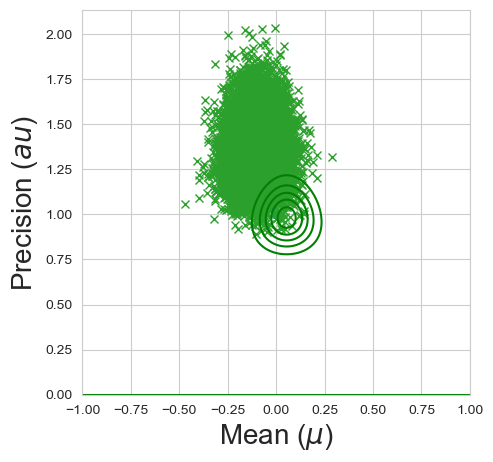

In [103]:
# Now Plot
plt.figure(figsize=[5,5])
plt.plot(MEAN, PRECISION, 'X', label='Actual')
plt.plot(X.mean(), 1/X.var(), 'o', label='Estimate')
plt.plot(samples_mu, samples_tau, 'x', label='Gibbs')
plt.contour(*np.meshgrid(mus, taus), Z_Exact.T, levels=5, colors=['green'])
# plt.xlim([-0.15, 0.26])
# plt.ylim([0.75, 1.25])
plt.xlabel('Mean ($\mu$)', fontsize=20)
_ = plt.ylabel('Precision ($\tau$)', fontsize=20)